(sec:ErrorPropagationSolutions)=
# Solutions

```{solution} exercise:BayesianAdvantage:correlated-errors
:label: solution:BayesianAdvantage:correlated-errors
:class: dropdown

\begin{align*}
\pdf{z}{I} &= \int \pdf{z}{x,y,I} \pdf{x,y}{I} dxdy = \int \delta(z-\sqrt{2}s) p(s|I) p(t|I) dsdt
\\
&= \left\{ 
\begin{array}{l}
\tilde{s}=\sqrt{2}s \, \Rightarrow \, ds = d\tilde{s}/\sqrt{2} \\
\delta(z-\sqrt{2}s) \to \delta(z/\sqrt{2}-\tilde{s})
\end{array}
\right\}
= \frac{1}{\sqrt{2}\sqrt{2\pi}\sigma_s}\exp \left( - \frac{z^2}{4\sigma_s^2} \right) \int p(t|I) dt .
\end{align*}

Here we can use that $\int p(t|I) dt = 1$. Defining $\sigma_z = \sqrt{2}\sigma_s$ we find

$$
\pdf{z}{I} = \frac{1}{\sqrt{2\pi}\sigma_z}\exp \left( - \frac{z^2}{2\sigma_z^2} \right) ,
$$

i.e. a normal distribution for $z$ with a small variance $2\sigma_s^2$.
```

```{solution} exercise:BayesianAdvantages:inferring-galactic-distances-ex
:label: solution:BayesianAdvantages:inferring-galactic-distances-ex
:class: dropdown

1. A fixed value for $H$ can be assigned with the PDF $\pdf{H}{I} = \delta(H-H_0)$, where $\delta(x)$ is the Kronecker delta. We note that integrals over a delta function are given by $\int_{-\infty}^{+\infty} f(x) \delta(x-x_0) dx = f(x_0)$ such that

   $$
   \pdf{d}{\data,I} \propto \exp\left( - \frac{(v_0 - H_0 d)^2}{2\sigma_v^2} \right),
   $$
   
   where we have ignored all normalization coefficients.
   
2. With a Gaussian prior for $H$ we will be left with an integral

   $$
   \pdf{d}{\data,I} \propto \int_{-\infty}^{+\infty} dH \exp\left( - \frac{(H-H_0)^2}{2  \sigma_H^2} \right) \exp\left( - \frac{(v_0 - H d)^2}{2\sigma_v^2} \right).
   $$
   
   We can perform this integral numerically, or we can solve it analytically by realizing that the product of two Gaussian distributions is another Gaussian distribution. 
   
3. The uniform prior for $\pdf{H}{I}$ implies that the final integral becomes

   $$
   \pdf{d}{\data,I} \propto \int_{H_0 - 2\sigma_H}^{H_0 + 2\sigma_H} dH \exp\left( - \frac{(v_0 - H d)^2}{2\sigma_v^2} \right).
   $$
   
For numerical integration, and plots of the results of the three inference strategies, see the hidden code block below.
```

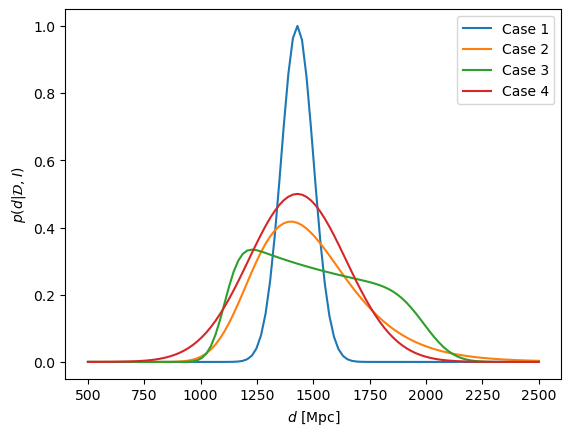

In [1]:
# Common imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Given information
H0=70
sigH=10
v0=10**5
sigv=5000

# grid for evaluating and plotting p(d|...)
dgrid = np.linspace(500,2500,100)

# Case 1
def pdf_1(d):
    return np.exp(-(v0-H0*d)**2/(2*sigv**2))
# Case 2
def pdf_2(H,d):
    return np.exp(-(H-H0)**2 / (2*sigH**2)) * np.exp(-(v0-H*d)**2 / (2*sigv**2))
# ... with numerical integration over H
pdf_2_grid = np.zeros_like(dgrid)
for i_d,di in enumerate(dgrid):
	I = integrate.quad(pdf_2, 0, 140, args=(di))
	pdf_2_grid[i_d] = I[0] / 20
# Case 3
def pdf_3(H,d):
    return np.exp(-(v0-H*d)**2 / (2*sigv**2))
# ... with numerical integration
pdf_3_grid = np.zeros_like(dgrid)
deltaH = np.sqrt(12*sigH**2/4)
for i_d,di in enumerate(dgrid):
	I = integrate.quad(pdf_3, H0-2*sigH, H0+2*sigH, args=(di))
	pdf_3_grid[i_d] = I[0] / 30
# Case 4 (see example 9.3)
d0 = v0/H0
sigd = d0*np.sqrt(sigH**2/H0**2 + sigv**2/v0**2)
def pdf_4(d):
    return np.exp(-(d-d0)**2 / (2*sigd**2)) / 2
    
fig,ax = plt.subplots(1,1)
ax.plot(dgrid,pdf_1(dgrid),label='Case 1')
ax.plot(dgrid,pdf_2_grid,label='Case 2')
ax.plot(dgrid,pdf_3_grid,label='Case 3')
ax.plot(dgrid,pdf_4(dgrid),label='Case 4')

ax.set_xlabel(r'$d$ [Mpc]')
ax.set_ylabel(r'$p(d|\mathcal{D},I)$')
ax.legend(loc='best');

```{solution} exercise:BayesianAdvantages:standard-random-variable
:label: solution:BayesianAdvantages:standard-random-variable
:class: dropdown

The transformation $z = f(x) = (x-\mu)/\sigma$ gives the inverse $x = f^{-1}(z) = \sigma z + \mu$ and the Jacobian $|dx/dz = \sigma|$.

Therefore $\pdf{z}{I} = \pdf{x}{I} \sigma$. With the given form of $\pdf{x}{I}$ we get

$$
\pdf{z}{I} = \frac{1}{\sqrt{2\pi}} \exp \left( -\frac{z^2}{2}\right),
$$

which corresponds to a Gaussian distribution with mean zero and variance one, sometimes known as a standard random variable.
```

```{solution} exercise:BayesianAdvantages:square-root-of-a-number
:label: solution:BayesianAdvantages:square-root-of-a-number
:class: dropdown

With $z = f(x) = \sqrt{x}$ we have $x = f^{-1}(z) = z^2$ such that $|dx/dz| = 2|z|$. We note that $z$ is positive such that $|z| = z$ and we therefore have

$$
\pdf{z}{I} = 2 z \pdf{x}{I} = 2 z \frac{1}{x_{\max} - x_{\min}} \quad \text{for } \sqrt{x_{\min}} \leq z \leq \sqrt{x_{\max}},
$$

and 0 elsewhere. 

We check the normalization by performing the integral

$$
\int_0^\infty \pdf{z}{I} dz = \int_{\sqrt{x_{\min}}}^{\sqrt{x_{\max}}} \frac{2z}{x_{\max} - x_{\min}} dz = \frac{1}{x_{\max} - x_{\min}} \left[ z^2 \right]_{\sqrt{x_{\min}}}^{\sqrt{x_{\max}}} = 1.
$$
```

```{solution} exercise:BayesianAdvantages:gaussian-sum-of-errors
:label: solution:BayesianAdvantages:gaussian-sum-of-errors
:class: dropdown

The PDF $\pdf{Z}{I}$ is Gaussian with mean $\expect{Z} = z_0 = x_0+y_0$ and variance $\var{Z} = \sigma_z^2 = \sigma_x^2 + \sigma_y^2$, where $x_0,y_0$ and $\sigma_x^2, \sigma_y^2$ are the means and variances of $X$ and $Y$, respectively.

This is the same result as in {prf:ref}`example:BayesianAdvantage:Z=X+Y` which should not be surprising since the errors were in fact Gaussian.
```

```{solution} exercise:BayesianAdvantages:gaussian-product-of-errors
:label: solution:BayesianAdvantages:gaussian-product-of-errors
:class: dropdown

The PDF $\pdf{Z}{I}$ is Gaussian with mean $\expect{Z} = z_0 = x_0 y_0$ and variance $\var{Z} = \sigma_z^2 = y_0^2 \sigma_x^2 + x_0^2 \sigma_y^2$, where $x_0,y_0$ and $\sigma_x^2, \sigma_y^2$ are the means and variances of $X$ and $Y$, respectively.
```